# TensorFlow Lite models overview

This notebook shows some basic information about two TensorFlow Lite models. For more details, take a look at blog post describing how to learn about models configuration before implementing them in mobile application.

## TensorFlow 2.0 alpha and Colaboratory
Examples presented in this notebook are built on top of TensorFlow 2.0 alpha version. As long as it's not a stable version yet, there is no guarantee that anything here will work as it should. 

This notebook was created only for the Colaboratory environment. It requires some changes to make it working on Docker environment described in linked blog post.

In [1]:
# Install TensorFlow 2.0 alpha
!pip install -U tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 63kB/s 
     |████████████████████████████████| 3.0MB 31.5MB/s 
     |████████████████████████████████| 61kB 25.6MB/s 
     |████████████████████████████████| 419kB 49.3MB/s 


In [0]:
import tensorflow as tf

In [3]:
print("TensorFlow Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Is GPU available: ", tf.test.is_gpu_available())

TensorFlow Version:  2.0.0-alpha0
Eager mode:  True
Is GPU available:  True


Download and unpack models:


*   Mnist model created as a part of blog post [TensorFlow Lite classification on Android ](https://thinkmobile.dev/mobile-intelligence-tensorflow-lite-classification-on-android/)
*   MobileNet v2 model taken from TensorFlow [hosted models website](https://www.tensorflow.org/lite/guide/hosted_models).



In [4]:
!curl -LO https://www.dropbox.com/s/4l8v42ofze3s6e2/mnist_model.tflite
!curl -LO http://download.tensorflow.org/models/tflite_11_05_08/mobilenet_v2_1.0_224.tgz
  
!mkdir mobilenet_v2_float
!tar -xzvf mobilenet_v2_1.0_224.tgz -C mobilenet_v2_float

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   990    0   990    0     0    783      0 --:--:--  0:00:01 --:--:--  1369
100 2617k  100 2617k    0     0  1361k      0  0:00:01  0:00:01 --:--:-- 23.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74.6M  100 74.6M    0     0  61.4M      0  0:00:01  0:00:01 --:--:-- 61.4M
mobilenet_v2_1.0_224.ckpt.data-00000-of-00001
mobilenet_v2_1.0_224.ckpt.index
mobilenet_v2_1.0_224.ckpt.meta
mobilenet_v2_1.0_224_eval.pbtxt
mobilenet_v2_1.0_224_frozen.pb
mobilenet_v2_1.0_224_info.txt
mobilenet_v2_1.0_224.tflite


# MNIST model info

Let's collect some information about Mnist TF Lite model.

In [0]:
TFLITE_MNIST_MODEL = "mnist_model.tflite"

In [0]:
interpreter = tf.lite.Interpreter(model_path=TFLITE_MNIST_MODEL)
interpreter.allocate_tensors()

In [7]:
print("== Input details ==")
print("name:", interpreter.get_input_details()[0]['name'])
print("shape:", interpreter.get_input_details()[0]['shape'])
print("type:", interpreter.get_input_details()[0]['dtype'])

print("\nDUMP INPUT")
print(interpreter.get_input_details()[0])

== Input details ==
name: flatten_input
shape: [ 1 28 28]
type: <class 'numpy.float32'>

DUMP INPUT
{'name': 'flatten_input', 'index': 10, 'shape': array([ 1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}


In [8]:
print("\n== Output details ==")
print("name:", interpreter.get_output_details()[0]['name'])
print("shape:", interpreter.get_output_details()[0]['shape'])
print("type:", interpreter.get_output_details()[0]['dtype'])

print("\nDUMP OUTPUT")
print(interpreter.get_output_details()[0])


== Output details ==
name: dense_2/Softmax
shape: [ 1 10]
type: <class 'numpy.float32'>

DUMP OUTPUT
{'name': 'dense_2/Softmax', 'index': 8, 'shape': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}


# MobileNet v2 model info

Now let's collect some information about MobileNet v2 TF Lite model.

In [0]:
MOBILENET_V2_FLOAT_MODEL = "mobilenet_v2_float/mobilenet_v2_1.0_224.tflite"

In [0]:
mobilenetV2F_interpreter = tf.lite.Interpreter(model_path=MOBILENET_V2_FLOAT_MODEL)
mobilenetV2F_interpreter.allocate_tensors()

In [11]:
print("== Input details ==")
print("name:", mobilenetV2F_interpreter.get_input_details()[0]['name'])
print("shape:", mobilenetV2F_interpreter.get_input_details()[0]['shape'])
print("type:", mobilenetV2F_interpreter.get_input_details()[0]['dtype'])

print("\nDUMP INPUT")
print(mobilenetV2F_interpreter.get_input_details()[0])

== Input details ==
name: input
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

DUMP INPUT
{'name': 'input', 'index': 173, 'shape': array([  1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}


In [12]:
print("\n== Output details ==")
print("name:", mobilenetV2F_interpreter.get_output_details()[0]['name'])
print("shape:", mobilenetV2F_interpreter.get_output_details()[0]['shape'])
print("type:", mobilenetV2F_interpreter.get_output_details()[0]['dtype'])

print("\nDUMP OUTPUT")
print(mobilenetV2F_interpreter.get_output_details()[0])


== Output details ==
name: MobilenetV2/Predictions/Reshape_1
shape: [   1 1001]
type: <class 'numpy.float32'>

DUMP OUTPUT
{'name': 'MobilenetV2/Predictions/Reshape_1', 'index': 62, 'shape': array([   1, 1001], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}


## MobileNet model check

Run inference process on MobileNet model with image input data normalized to two different ranges: [-1, 1] and [0, 1].

Predicted value for [0, 1] normalization. Label index: 682, confidence: 39%
Predicted value for [-1, 1] normalization. Label index: 682, confidence: 53%


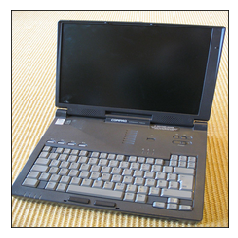

In [13]:
from PIL import Image
import PIL.ImageOps  
import requests
import numpy as np
import matplotlib.pyplot as plt

imgUrl = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Compaqarmada7800.jpg/1024px-Compaqarmada7800.jpg"
img = Image.open(requests.get(imgUrl, stream=True).raw)
img.load()
img = img.resize((224, 224), PIL.Image.ANTIALIAS)

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

# Normalize to [0, 1]
data = np.asarray( img, dtype="int32" ) / 255.0

# Normalize to [-1, 1]
data2 = (np.asarray( img, dtype="int32" ) - 128.0) / 128.0

# Inference on input data normalized to [0, 1]
inputImg = np.expand_dims(data,0).astype(np.float32)
input_details = mobilenetV2F_interpreter.get_input_details()
mobilenetV2F_interpreter.set_tensor(input_details[0]['index'], inputImg)

mobilenetV2F_interpreter.invoke()

output_details = mobilenetV2F_interpreter.get_output_details()
output_data = mobilenetV2F_interpreter.get_tensor(output_details[0]['index'])
print("Predicted value for [0, 1] normalization. Label index: {}, confidence: {:2.0f}%"
      .format(np.argmax(output_data), 
              100 * output_data[0][np.argmax(output_data)]))

# Inference on input data normalized to [-1, 1]
inputImg2 = np.expand_dims(data2,0).astype(np.float32)
input_details = mobilenetV2F_interpreter.get_input_details()
mobilenetV2F_interpreter.set_tensor(input_details[0]['index'], inputImg2)

mobilenetV2F_interpreter.invoke()

output_details = mobilenetV2F_interpreter.get_output_details()
output_data = mobilenetV2F_interpreter.get_tensor(output_details[0]['index'])
print("Predicted value for [-1, 1] normalization. Label index: {}, confidence: {:2.0f}%".format(np.argmax(output_data), 100 * output_data[0][np.argmax(output_data)]))